<a href="https://colab.research.google.com/github/kingglory/langchain-chinese-learning/blob/main/langchain%E4%B8%AD%E6%96%87%E7%BB%83%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install packages

In [5]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00


In [14]:
pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32002 sha256=e6bc6f9637f2edd4f2a7c99637967805f799771e4f73e68cf9e9a63d6f7dcd6b
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [18]:
pip install unstructured

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 96.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB

In [20]:
pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
!pip install langchain
!pip install openai
!pip install google-search-results
!pip install unstructured
!pip install chromadb
!pip install pinecone-client
!pip install youtube-transcript-api
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.7/922.7 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 21.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00


-----  

In [1]:
import os
os.environ["OPENAI_API_KEY"] = 'sk-'

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003",max_tokens=1024)
llm("怎么评价人工智能")

## 通过 Google 搜索并返回答案

接下来，我们就来搞点有意思的。我们来让我们的 OpenAI api 联网搜索，并返回答案给我们。
这里我们需要借助 Serpapi 来进行实现，Serpapi 提供了 google 搜索的 api 接口。
首先需要我们到 Serpapi 官网上注册一个用户，https://serpapi.com/ 并复制他给我们生成 api key。
然后我们需要像上面的 openai api key 一样设置到环境变量里面去。

In [10]:
os.environ["SERPAPI_API_KEY"] = '3fdf'

In [12]:
import langchain
print(dir(langchain.llms))

['AI21', 'AlephAlpha', 'Anthropic', 'Anyscale', 'AzureOpenAI', 'Banana', 'BaseLLM', 'Beam', 'Bedrock', 'CTransformers', 'CerebriumAI', 'Cohere', 'Databricks', 'DeepInfra', 'Dict', 'FakeListLLM', 'ForefrontAI', 'GPT4All', 'GooglePalm', 'GooseAI', 'HuggingFaceEndpoint', 'HuggingFaceHub', 'HuggingFacePipeline', 'HuggingFaceTextGenInference', 'HumanInputLLM', 'LlamaCpp', 'Modal', 'MosaicML', 'NLPCloud', 'OpenAI', 'OpenAIChat', 'OpenLM', 'Petals', 'PipelineAI', 'PredictionGuard', 'PromptLayerOpenAI', 'PromptLayerOpenAIChat', 'RWKV', 'Replicate', 'SagemakerEndpoint', 'SelfHostedHuggingFaceLLM', 'SelfHostedPipeline', 'StochasticAI', 'Type', 'VertexAI', 'Writer', '__all__', '__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'ai21', 'aleph_alpha', 'anthropic', 'anyscale', 'bananadev', 'base', 'beam', 'bedrock', 'cerebriumai', 'cohere', 'ctransformers', 'databricks', 'deepinfra', 'fake', 'forefrontai', 'google_

In [15]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
from langchain.agents import AgentType

# 加载 OpenAI 模型
llm = OpenAI(temperature=0,max_tokens=2048) 

 # 加载 serpapi 工具
tools = load_tools(["serpapi"])

# 如果搜索完想再计算一下可以这么写
# tools = load_tools(['serpapi', 'llm-math'], llm=llm)

# 如果搜索完想再让他再用python的print做点简单的计算，可以这样写
# tools=load_tools(["serpapi","python_repl"])

# 工具加载后都需要初始化，verbose 参数为 True，会打印全部的执行详情
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# 运行 agent
agent.run("What's the date today? What great events have taken place today in history?")



> Entering new AgentExecutor chain...
 I should look up the current date and then search for historical events that have taken place on that day.
Action: Search
Action Input: Current date
Observation: Today's current date and time with time zone and date picker: Select locale. en-US. Wednesday, May 31, 2023. 5:00:05 PM. PST8PDT (GMT-7).
Thought: I should now search for historical events that have taken place on this day.
Action: Search
Action Input: Historical events May 31
Observation: 1911 – The RMS Titanic is launched in Belfast, Northern Ireland. 1911 – The President of Mexico Porfirio Díaz flees the country during the Mexican Revolution. 1916 – World War I: Battle of Jutland: The British Grand Fleet engages the High Seas Fleet in the largest naval battle of the war, which proves indecisive.
Thought: I now know the final answer.
Final Answer: Today is Wednesday, May 31, 2023. Historical events that have taken place on this day include the launch of the RMS Titanic in Belfast, Nor

'Today is Wednesday, May 31, 2023. Historical events that have taken place on this day include the launch of the RMS Titanic in Belfast, Northern Ireland, the flight of the President of Mexico Porfirio Díaz during the Mexican Revolution, and the Battle of Jutland in World War I.'

我们可以看到，他正确的返回了日期（有时差），并且返回了历史上的今天。  

在 chain 和 agent 对象上都会有 verbose 这个参数，这个是个非常有用的参数，开启他后我们可以看到完整的 chain 执行过程。  

可以在上面返回的结果看到，他将我们的问题拆分成了几个步骤，然后一步一步得到最终的答案。
关于agent type 几个选项的含义（理解不了也不会影响下面的学习，用多了自然理解了）：
* zero-shot-react-description: 根据工具的描述和请求内容的来决定使用哪个工具（最常用）
* react-docstore: 使用 ReAct 框架和 docstore 交互, 使用Search 和Lookup 工具, 前者用来搜, 后者寻找term, 举例: Wipipedia 工具
* self-ask-with-search 此代理只使用一个工具: Intermediate Answer, 它会为问题寻找事实答案(指的非 gpt 生成的答案, 而是在网络中,文本中已存在的), 如 Google search API 工具
* conversational-react-description: 为会话设置而设计的代理, 它的prompt会被设计的具有会话性, 且还是会使用 ReAct 框架来决定使用来个工具, 并且将过往的会话交互存入内存
  
    -  reAct 介绍可以看这个：https://arxiv.org/pdf/2210.03629.pdf
    - LLM 的 ReAct 模式的 Python 实现: https://til.simonwillison.net/llms/python-react-pattern
    - agent type 官方解释：
https://python.langchain.com/en/latest/modules/agents/agents/agent_types.html?highlight=zero-shot-react-description

有一点要说明的是，这个 serpapi 貌似对中文不是很友好，所以提问的 prompt 建议使用英文。

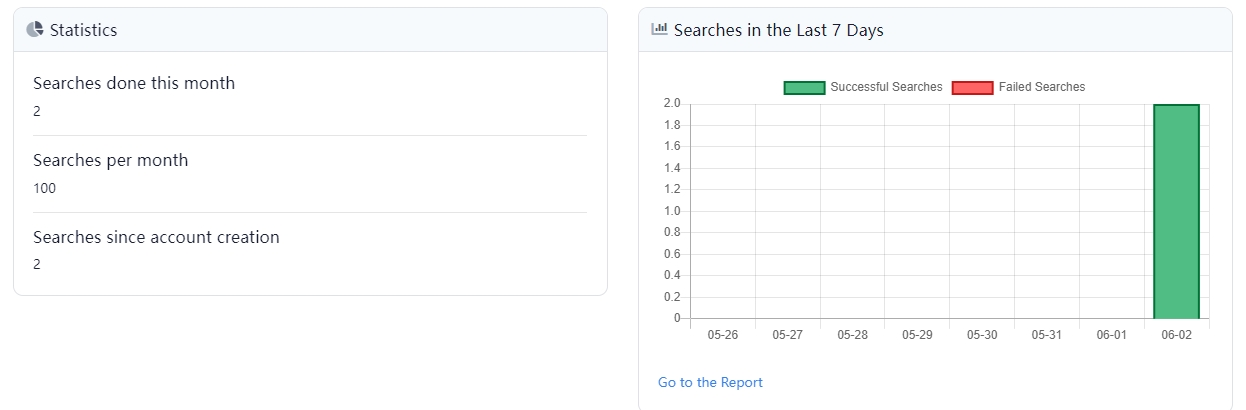

上面那个任务一共搜索了两次（ serpapi 一个月免费搜索100次）

## 对超长文本进行总结

假如我们想要用 openai api 对一个段文本进行总结，我们通常的做法就是直接发给 api 让他总结。但是如果文本超过了 api 最大的 token 限制就会报错。
这时，我们一般会进行对文章进行分段，比如通过 tiktoken 计算并分割，然后将各段发送给 api 进行总结，最后将各段的总结再进行一个全部的总结。
如果，你用是 LangChain，他很好的帮我们处理了这个过程，使得我们编写代码变的非常简单。

In [25]:
from langchain.document_loaders import UnstructuredFileLoader
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain import OpenAI

# 导入文本
loader = UnstructuredFileLoader("/content/langchain_data/lg_test.txt")
# 将文本转成 Document 对象
document = loader.load()
print(f'documents:{len(document)}')

# 初始化文本分割器
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0
)

# 切分文本
split_documents = text_splitter.split_documents(document)
print(f'documents:{len(split_documents)}')

# 加载 llm 模型
llm = OpenAI(model_name="text-davinci-003", max_tokens=1500)

# 创建总结链
chain = load_summarize_chain(llm, chain_type="refine", verbose=True)

# 执行总结链，（为了快速演示，只总结前5段）
chain.run(split_documents[:5])

documents:1
documents:331


> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"声明：本书为爱奇电子书(www.i7wu.cn)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。























































用户上传之内容开始

































































《地藏心经》

作者：铸剑师无名

正文

第一第十五章 天下势，渡江（一）

“渝州陆家？！”

虽然原本的那个秦逸，每日只知道苦读诗书，从未与商贾们打过交道，但是渝州陆家的名声，他还是知道。

陆家三代为官，官至两江总督，五代经商，百年经营，家私何止千万，直至今朝，俨然已是江南一等士族大户。渝州陆氏以皮货起家，乃是西北之地数得上号的商户，西北之地所产的皮货，有三成经他们之手卖往江南。

若只是如此，陆氏也不过是一头肥硕的羔羊，只待他人宰杀。"


CONCISE SUMMARY:



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Your job is to produce a final summary
We have provided an existing summary up to a certain point:  这本书的内容是《地藏心经》，作者是铸剑师无名。第一第十五章讲述了渝州陆家的家族史，他们是以皮货起家的西北商户，出售江南的皮货占了三成，但他们也只是一头肥硕的羔羊，只待他人宰杀。
We have the opportunity to refine the existing summary(only if needed) with some more context below.
------------
陆氏三代家主都极具雄韬伟略，以千金买官，以万金开路，更是在蛮夷南侵之时，倾尽家资招兵买马，拒十万蛮夷铁骑于侯关外，短短三年间，便一手扶持起了都护大将军——苏和，抗夷大将军——邓昌。

以姻亲握住兵权后，陆氏子弟一路仕途平坦，百年来，人才辈出，更有陆云，陆羽等良将贤才。

而今，已是雄踞渝、豫两地的世家阀门，这江南数万水军，便是掌握在这一代的陆家族长手中。

朝廷无权，皇帝无兵，短短十年，南朝便形同虚设，各地封疆大使，世家阀门手握重兵，除了京都三省还在南朝皇族手中，其他俨然已经分地而治。

西北，邓、李、苏、何、公孙五家世家阀门割据一方，联手共抗蛮夷合并后的金国。

南方，陆、熊、刘、郑四家百年士族据守江南，与中山国相持已然数十载。

东方，京都三省雄兵三十万，黑甲铁骑八千，时刻防范着秦国有所异动。（备注：黑甲铁骑配备长枪，马刀，黑铁重甲，所乘骑的乃是西域宛马，是南朝立国时便赫赫有名的百战铁骑。曾以八千黑甲铁骑破中山国十万雄兵而名动天下。）

这些，便是张狂融合完原本那个‘秦逸’的记忆，而整理出的天下大势。
------------
Given the new context, refine the original summary
If the context isn't useful, return the original summary.

> Finished chain.


> Entering new 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Your job is to produce a final summary
We have provided an existing summary up to a certain point:  

这本书的内容是《地藏心经》，作者是铸剑师无名。第一第十五章讲述了渝州陆家的家族史，他们是以皮货起家的西北商户，出售江南的皮货占了三成，但也只是一头肥硕的羔羊，只待他人宰杀。陆氏三代家主都极具雄韬伟略，以千金买官，以万金开路，更是在蛮夷南侵之时，倾尽家资招兵买马，拒十万蛮夷铁骑于侯关外，短短三年间，便一手扶持起了都护大将军——苏和，抗夷大将军——邓昌。以姻亲握住兵权后，陆氏子弟一路仕途平坦，百年来，人才辈出，更有陆云，陆羽等良将贤才。现在，陆家族已形成了雄踞渝、豫两地的世家阀门，掌握着江南数万水军，朝廷无权，皇帝无兵，南朝形同虚设，而西北、南方、东方各地都有世家阀门割据一方，抗击蛮夷合并后的金国，而秦家也并没有被淹没，举止优雅，虽未能抗衡陆家，但也不会被压迫，最终在年关前，秦家依然布置了一些家业，安定下来。最终，陆家族已经形成了一个强大的家族阀门，掌控着江南数万水军，朝廷无权，皇帝无兵，南朝形同虚设，而西北、南方、东方各地也都有世家阀门割据一方，抗击蛮夷合并后的金国，但是秦家也并未被淹没，他们依旧带着士族风范，举止优雅，虽未能抗衡陆家，却也不会被压迫，最终在年关前，秦家依然布置了一些家业，安定下来。
We have the opportunity to refine the existing summary(only if needed) with some more context below.
------------
就在秦逸准备寻一处清净地，安安静静的等待陆家车行的人先走时，远处，一团人簇拥着一个青衫老者往这边走来。而为首的，正是昨日在路上遇到的那个满脸扎须的壮年汉子。

“那便是陆家车行的管事。”一旁的中年商人适时的报出了那位青衫老者的身份。

“陆氏车行？管事？”

秦逸眉头一挑，不由得心头一动。若是等到陆家车行货物运完，这一来一去，天怕是已经摸黑了，想来渡江只能等到明晚。既然面前，就是陆家车行的管事


> Finished chain.

> Finished chain.


'\n\n这本书的内容是《地藏心经》，作者是铸剑师无名。第一第十五章讲述了渝州陆家的家族史，他们是以皮货起家的西北商户，出售江南的皮货占了三成，但也只是一头肥硕的羔羊，只待他人宰杀。陆氏三代家主都极具雄韬伟略，以千金买官，以万金开路，更是在蛮夷南侵之时，倾尽家资招兵买马，拒十万蛮夷铁骑于侯关外。经过百年来的积累，陆家族已形成了雄踞渝、豫两地的世家阀门，掌握着江南数万水军，朝廷无权，皇帝无兵，南朝形同虚设，而西北、南方、东方各地也都有世家阀门割据一方，抗击蛮夷合并后的金国，但是秦家也并未被淹没，他们依旧带着士族风范，举止优雅，虽未能抗衡陆家，却也不会被压迫，最终在年关前，秦家依然布置了一些家业，安定下来。本书讲述了陆家的家族史，他们以皮货起家，凭借着雄韬伟略的家主们，百年来积累而形成的雄踞渝、豫两地的世家阀门，掌握着江南数万水军，朝廷无权，皇帝无兵，南朝形同虚设，而西北、南方、东方各地也都有世家阀门割据一方，抗击蛮夷合并后的金国。尽管秦家无法抗衡陆家，他们仍然不会被压迫，在年关前，他们也布置了一些家业，安定下来。'

首先我们对切割前和切割后的 document 个数进行了打印，我们可以看到，切割前就是只有整篇的一个 document，切割完成后，会把上面一个 document 切成 331 个 document。

最终输出了对前 5 个 document 的总结:



这本书的内容是《地藏心经》，作者是铸剑师无名。第一第十五章讲述了渝州陆家的家族史，他们是以皮货起家的西北商户，出售江南的皮货占了三成，但也只是一头肥硕的羔羊，只待他人宰杀。陆氏三代家主都极具雄韬伟略，以千金买官，以万金开路，更是在蛮夷南侵之时，倾尽家资招兵买马，拒十万蛮夷铁骑于侯关外。经过百年来的积累，陆家族已形成了雄踞渝、豫两地的世家阀门，掌握着江南数万水军，朝廷无权，皇帝无兵，南朝形同虚设，而西北、南方、东方各地也都有世家阀门割据一方，抗击蛮夷合并后的金国，但是秦家也并未被淹没，他们依旧带着士族风范，举止优雅，虽未能抗衡陆家，却也不会被压迫，最终在年关前，秦家依然布置了一些家业，安定下来。本书讲述了陆家的家族史，他们以皮货起家，凭借着雄韬伟略的家主们，百年来积累而形成的雄踞渝、豫两地的世家阀门，掌握着江南数万水军，朝廷无权，皇帝无兵，南朝形同虚设，而西北、南方、东方各地也都有世家阀门割据一方，抗击蛮夷合并后的金国。尽管秦家无法抗衡陆家，他们仍然不会被压迫，在年关前，他们也布置了一些家业，安定下来。

#### 几个参数需要注意：

**文本分割器的 chunk_overlap 参数**

这个是指切割后的每个 document 里包含几个上一个 document 结尾的内容，主要作用是为了增加每个 document 的上下文关联。比如，chunk_overlap=0时， 第一个 document 为 aaaaaa，第二个为 bbbbbb；当 chunk_overlap=2 时，第一个 document 为 aaaaaa，第二个为 aabbbbbb。
不过，这个也不是绝对的，要看所使用的那个文本分割模型内部的具体算法。

 * 文本分割器可以参考这个文档：https://python.langchain.com/en/latest/modules/indexes/text_splitters.html

**chain 的 chain_type 参数**

这个参数主要控制了将 document 传递给 llm 模型的方式，一共有 4 种方式：


*  stuff: 这种最简单粗暴，会把所有的 document 一次全部传给 llm 模型进行总结。如果document很多的话，势必会报超出最大 token 限制的错，所以总结文本的时候一般不会选中这个。
*   map_reduce: 这个方式会先将每个 document 进行总结，最后将所有 document 总结出的结果再进行一次总结。




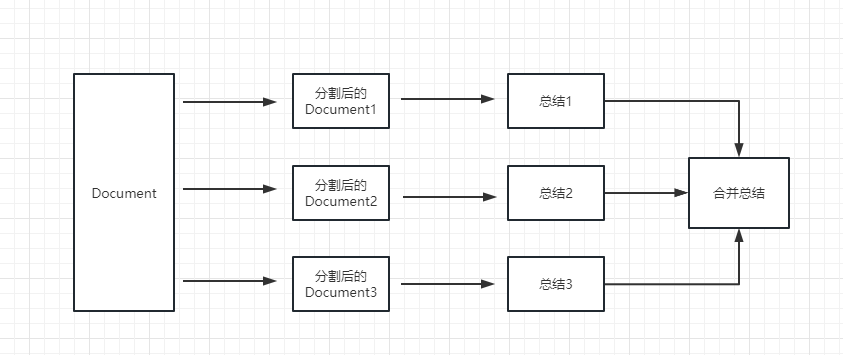

 *  refine: 这种方式会先总结第一个 document，然后在将第一个 document 总结出的内容和第二个 document 一起发给 llm 模型在进行总结，以此类推。这种方式的好处就是在总结后一个 document 的时候，会带着前一个的 document 进行总结，给需要总结的 document 添加了上下文，增加了总结内容的连贯性。

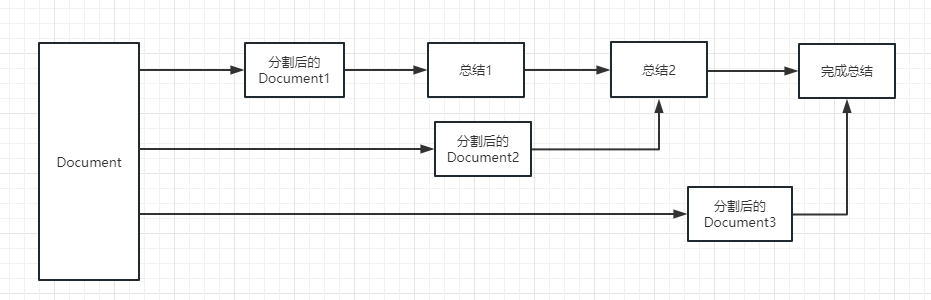

* map_rerank: 这种一般不会用在总结的 chain 上，而是会用在问答的 chain 上，他其实是一种搜索答案的匹配方式。首先你要给出一个问题，他会根据问题给每个 document 计算一个这个 document 能回答这个问题的概率分数，然后找到分数最高的那个 document ，在通过把这个 document 转化为问题的 prompt 的一部分（问题+document）发送给 llm 模型，最后 llm 模型返回具体答案。